In [1]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
# Load The Data
df = pd.read_csv("AAPL.csv", index_col=0, parse_dates=True)
df = df.drop(['Adj Close'], axis=1)

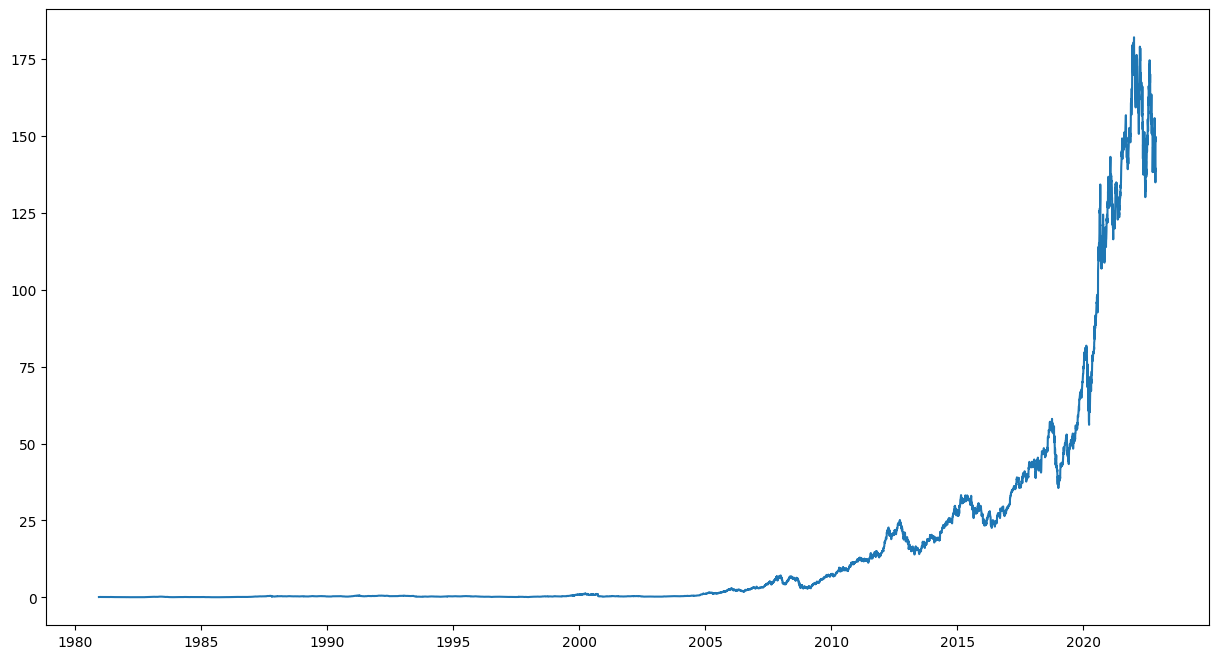

In [3]:
# View the stock price chart
figure(figsize=(15, 8))
plt.plot(df['Close'])

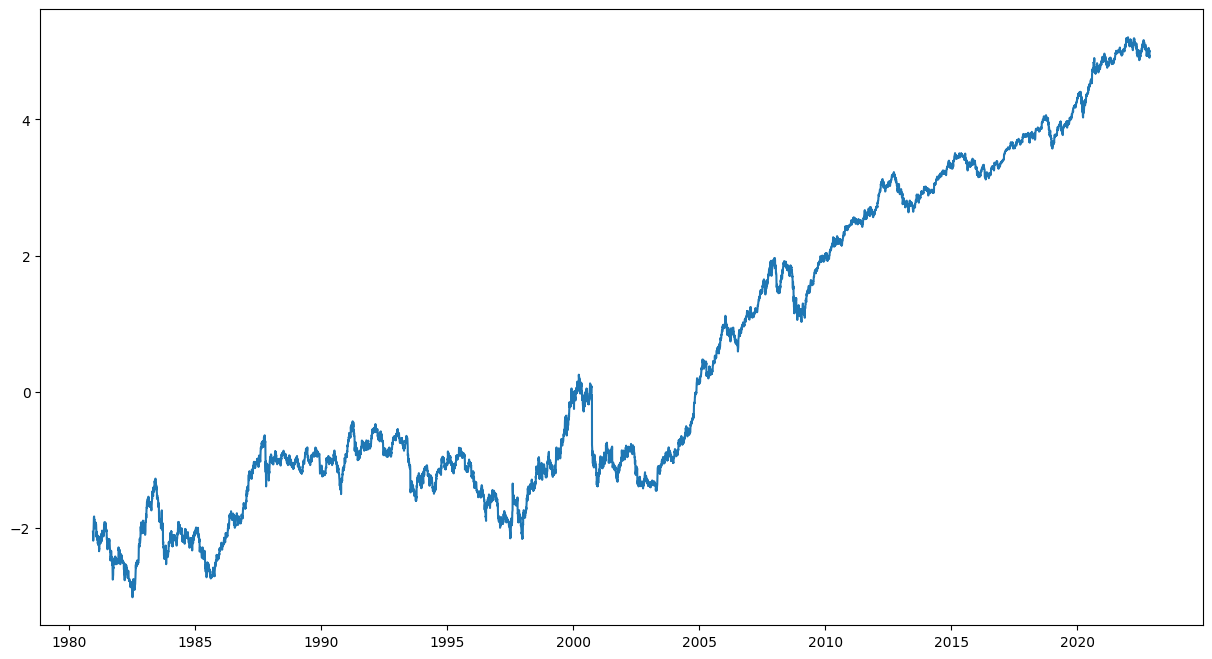

In [4]:
# View log stock price
figure(figsize=(15, 8))
plt.plot(np.log(df['Close']))

In [5]:
# FEATURE ENGINEERING

# Momentum
df['AO'] = ta.ao(df.High, df.Low)
df['CCI'] = ta.cci(df.High, df.Low, df.Close, 13)
df['RSI'] = ta.rsi(df.Close, 13)

# Overlap
df['EMA'] = ta.ema(df.Close, 20) / df.Close - 1
df['SMA'] = ta.sma(df.Close, 20) / df.Close - 1
df['SINWMA'] = ta.sinwma(df.Close, 20) / df.Close - 1

# Stats
df['Z'] = ta.zscore(df.Close, 50)

# Trend
df['AROON'] = ta.aroon(df.High, df.Low, 50).iloc[:,-1]
df['CHOP'] = ta.chop(df.High, df.Low, df.Close, 50)

# Volatility
df['ABERRATION'] = ta.aberration(df.High, df.Low, df.Close, 50).iloc[:,-1]
df['MASS'] = ta.massi(df.High, df.Low, 50)

# Volume
df['ADOSC'] = ta.adosc(df.High, df.Low, df.Close, df.Volume)

In [6]:
df

,Open,High,Low,Close,Volume,AO,CCI,RSI,EMA,SMA,SINWMA,Z,AROON,CHOP,ABERRATION,MASS,ADOSC
Date,,,,,,,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-08,140.410004,141.429993,137.490005,139.500000,89908500,-4.144001,-98.301407,41.618987,0.038148,0.038269,0.051024,-1.320587,-46.0,54.303791,5.297270,53.501051,-2.482955e+07
2022-11-09,138.500000,138.550003,134.589996,134.869995,74917800,-6.072883,-115.257286,36.804488,0.066759,0.072626,0.086655,-1.900756,-46.0,54.310945,5.271452,53.584226,-3.774136e+07
2022-11-10,141.240005,146.869995,139.500000,146.869995,118854000,-5.390001,-11.418866,52.298220,-0.018457,-0.013692,-0.003143,-0.141000,-46.0,55.170935,5.720022,53.697529,-1.775249e+06


In [7]:
# TARGET PREPARATION
df['NEXT DAY RETURN'] = df['Close'].pct_change(1).shift(-1) * 100
df.dropna(inplace=True)

In [8]:
# X, Y, Train/Test Split
split_ratio = 0.8
split_idx = int(len(df)*split_ratio)

# Regression
X_train, Y_train = df.iloc[:split_idx, :-1], df.iloc[:split_idx, -1]
X_test, Y_test   = df.iloc[split_idx:, :-1], df.iloc[split_idx:, -1]

# Classification (direction of price movement)
Y_train_class = (Y_train >= 0)*2.0 - 1.0
Y_test_class  = (Y_test  >= 0)*2.0 - 1.0

In [9]:
# Initialize wide variety of non-NN ML models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm          import SVC, SVR
from sklearn.neighbors    import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree         import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble     import AdaBoostClassifier, AdaBoostRegressor, RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor

# Load relevant performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, f1_score, roc_auc_score 

In [10]:
# Initialize wide variety of Machine Learning models
LR = LinearRegression()
LR_c = LogisticRegression()

SVM = SVR()
SVM_c = SVC()

KNN = KNeighborsRegressor()
KNN_c = KNeighborsClassifier()

DT = DecisionTreeRegressor()
DT_c = DecisionTreeClassifier()

ADA = AdaBoostRegressor()
ADA_c = AdaBoostClassifier()

RF = RandomForestRegressor()
RF_c = RandomForestClassifier()

GB = GradientBoostingRegressor()
GB_c = GradientBoostingClassifier()

regressors = [LR, SVM, KNN, DT, ADA, RF, GB]
classifiers = [SVM_c, KNN_c, DT_c, ADA_c, RF_c, GB_c]

In [11]:
regression_mae = {}
classification_acc = {}
classification_auc = {}


# Train and evaluate regressors
for regressor in regressors:
    name = str(regressor)[:-2]
    regressor.fit(X_train, Y_train)
    mae = mean_absolute_error(Y_test, regressor.predict(X_test))
    regression_mae[name] = mae

# Train and evaluate classifiers
for classifier in classifiers:
    name = str(classifier)[:-2]
    classifier.fit(X_train, Y_train_class)
    
    acc = accuracy_score(Y_test_class, classifier.predict(X_test))
    auc = roc_auc_score(Y_test_class, classifier.predict(X_test))
    
    classification_acc[name] = acc
    classification_auc[name] = auc

In [12]:
# Load all nessesary Deep Learning Libraries

import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [13]:
# Neural Networks Need Scaled Data
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='min')

# Simple ANN (MLP) - Regression
ANN = Sequential()
ANN.add(Dense(12, input_shape=(X_train_scaled.shape[1],), activation='linear'))
ANN.add(Dense(8, activation='linear'))
ANN.add(Dense(4, activation='linear'))
ANN.add(Dense(2, activation='linear'))
ANN.add(Dense(1, activation='linear'))
ANN.compile(loss = "mean_absolute_error", optimizer=Adam(learning_rate=0.001))

ANN.fit(X_train_scaled, Y_train, epochs=100, validation_data=(X_test_scaled, Y_test), callbacks=[earlyStopping, mcp_save, reduce_lr_loss])

mae = mean_absolute_error(Y_test, ANN.predict(X_test_scaled))
regression_mae["ANN"] = mae


# Simple ANN (MLP) - Classification
ANN = Sequential()
ANN.add(Dense(12, input_shape=(X_train_scaled.shape[1],), activation='linear'))
ANN.add(Dense(8, activation='linear'))
ANN.add(Dense(4, activation='linear'))
ANN.add(Dense(2, activation='relu'))
ANN.add(Dense(1, activation='sigmoid'))
ANN.compile(loss = "binary_crossentropy", optimizer=Adam(learning_rate=0.001))

ANN.fit(X_train_scaled, Y_train_class, epochs=100, validation_data=(X_test_scaled, Y_test_class), callbacks=[earlyStopping, mcp_save, reduce_lr_loss])

acc = accuracy_score(Y_test_class, (ANN.predict(X_test_scaled) > 0.5)*2.0 - 1.0)
auc = roc_auc_score(Y_test_class, (ANN.predict(X_test_scaled) > 0.5)*2.0 - 1.0)

classification_acc["ANN"] = acc
classification_auc["ANN"] = auc

2022-11-17 17:31:29.628141: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-17 17:31:29.628707: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 8397 samples, validate on 2100 samples
Epoch 1/100
8397/8397 [==============================] - 1s 114us/step - loss: 2.1690 - val_loss: 2.1905
Epoch 2/100
8397/8397 [==============================] - 0s 44us/step - loss: 2.1115 - val_loss: 2.3169
Epoch 3/100
8397/8397 [==============================] - 0s 44us/step - loss: 2.1130 - val_loss: 1.8396
Epoch 4/100
8397/8397 [==============================] - 0s 44us/step - loss: 2.1105 - val_loss: 1.8047
Epoch 5/100
8397/8397 [==============================] - 0s 45us/step - loss: 2.1106 - val_loss: 1.5461
Epoch 6/100
8397/8397 [==============================] - 0s 45us/step - loss: 2.1093 - val_loss: 1.5631
Epoch 7/100
8397/8397 [==============================] - 0s 47us/step - loss: 2.1096 - val_loss: 1.8643
Epoch 8/100
8397/8397 [==============================] - 0s 46us/step - loss: 2.1088 - val_loss: 2.1111
Epoch 9/100
8397/8397 [==============================] - 0s 45us/step - loss: 2.1085 - val_loss: 1.6961
Epoch 10/100
83

In [14]:
X_train_scaled_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# lstm - Regression
lstm = Sequential()
lstm.add(LSTM(12, input_shape=(1, X_train_scaled_lstm.shape[2]), activation='linear'))
lstm.add(Dense(8, activation='linear'))
lstm.add(Dense(4, activation='linear'))
lstm.add(Dense(2, activation='linear'))
lstm.add(Dense(1, activation='linear'))
lstm.compile(loss = "mean_absolute_error", optimizer=Adam(learning_rate=0.001))

lstm.fit(X_train_scaled_lstm, Y_train, epochs=100, validation_data=(X_test_scaled_lstm, Y_test), callbacks=[earlyStopping, mcp_save, reduce_lr_loss])

mae = mean_absolute_error(Y_test, lstm.predict(X_test_scaled_lstm))
regression_mae["lstm"] = mae


# Simple ANN - Classification
lstm = Sequential()
lstm.add(LSTM(12, input_shape=(1, X_train_scaled_lstm.shape[2]), activation='linear'))
lstm.add(Dense(8, activation='linear'))
lstm.add(Dense(4, activation='linear'))
lstm.add(Dense(2, activation='relu'))
lstm.add(Dense(1, activation='sigmoid'))
lstm.compile(loss = "binary_crossentropy", optimizer=Adam(learning_rate=0.001))

lstm.fit(X_train_scaled_lstm, Y_train_class, epochs=100, validation_data=(X_test_scaled_lstm, Y_test_class), callbacks=[earlyStopping, mcp_save, reduce_lr_loss])

acc = accuracy_score(Y_test_class, (lstm.predict(X_test_scaled_lstm) > 0.5)*2.0 - 1.0)
auc = roc_auc_score(Y_test_class, (lstm.predict(X_test_scaled_lstm) > 0.5)*2.0 - 1.0)

classification_acc["lstm"] = acc
classification_auc["lstm"] = auc

Train on 8397 samples, validate on 2100 samples
Epoch 1/100
8397/8397 [==============================] - 2s 265us/step - loss: 2.1085 - val_loss: 1.5381
Epoch 2/100
8397/8397 [==============================] - 1s 87us/step - loss: 2.1031 - val_loss: 1.5109
Epoch 3/100
8397/8397 [==============================] - 1s 84us/step - loss: 2.1027 - val_loss: 1.4766
Epoch 4/100
8397/8397 [==============================] - 1s 90us/step - loss: 2.1017 - val_loss: 1.4103
Epoch 5/100
8397/8397 [==============================] - 1s 85us/step - loss: 2.1007 - val_loss: 2.1460
Epoch 6/100
8397/8397 [==============================] - 1s 84us/step - loss: 2.1010 - val_loss: 1.7602
Epoch 7/100
8397/8397 [==============================] - 1s 85us/step - loss: 2.0998 - val_loss: 1.7858
Epoch 8/100
8397/8397 [==============================] - 1s 85us/step - loss: 2.0993 - val_loss: 2.3020
Epoch 9/100
8397/8397 [==============================] - 1s 85us/step - loss: 2.0991 - val_loss: 2.5535
Epoch 10/100
83

In [16]:
import autokeras as ak

predict_from = 1
predict_until = 1
lookback = 3

# Regression

clf = ak.TimeseriesForecaster(
    lookback=lookback,
    predict_from=predict_from,
    predict_until=predict_until,
    max_trials=1,
    objective="val_loss",
)

# Train the TimeSeriesForecaster with train data
clf.fit(
    x=X_train_scaled,
    y=Y_train,
    validation_data=(X_test_scaled, Y_test),
    batch_size=32,
    epochs=10,
)

# Predict with the best model(includes original training data).
mae = mean_absolute_error(Y_test, lstm.predict(X_test_scaled_lstm))
regression_mae["autokeras"] = mae


# Classification

clf_class = ak.TimeseriesForecaster(
    lookback=lookback,
    predict_from=predict_from,
    predict_until=predict_until,
    max_trials=1,
    objective="val_loss",
)

# Train the TimeSeriesForecaster with train data
clf_class.fit(
    x=X_train_scaled,
    y=Y_train,
    validation_data=(X_test_scaled, Y_test),
    batch_size=32,
    epochs=10,
)

# Predict with the best model(includes original training data).
acc = accuracy_score(Y_test_class, (clf_class.predict(X_test_scaled_lstm) > 0.5)*2.0 - 1.0)
auc = roc_auc_score(Y_test_class, (clf_class.predict(X_test_scaled_lstm) > 0.5)*2.0 - 1.0)

classification_acc["autokeras"] = acc
classification_auc["autokeras"] = auc

In [17]:
pd.Series(regression_mae.values(), index=regression_mae.keys()).sort_values()

autokeras                    1.229348
SVR                          1.299166
ANN                          1.347960
RandomForestRegressor        1.376893
AdaBoostRegressor            1.514114
GradientBoostingRegressor    1.566891
KNeighborsRegressor          1.630355
LinearRegression             1.727284
lstm                         2.358393
DecisionTreeRegressor        2.534765
dtype: float64

In [18]:
pd.Series(classification_acc.values(), index=classification_acc.keys()).sort_values(ascending=False)

autokeras                     0.532937
SVC                           0.527619
KNeighborsClassifier          0.490476
GradientBoostingClassifier    0.485238
RandomForestClassifier        0.480952
DecisionTreeClassifier        0.479524
AdaBoostClassifier            0.476190
ANN                           0.472381
lstm                          0.472381
dtype: float64

In [19]:
pd.Series(classification_auc.values(), index=classification_auc.keys()).sort_values(ascending=False)

autokeras                     0.523946
GradientBoostingClassifier    0.503319
AdaBoostClassifier            0.502819
RandomForestClassifier        0.501052
SVC                           0.500000
ANN                           0.500000
lstm                          0.500000
DecisionTreeClassifier        0.488142
KNeighborsClassifier          0.487809
dtype: float64